# データ選択０

In [1]:
import pathlib
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from collections import deque

In [2]:
# BODY_25 Output Format
keypointsMapping = {
    0: 'Nose',
    1: 'Neck',
    2: 'RShoulder',
    3: 'RElbow',
    4: 'RWrist',
    5: 'LShoulder',
    6: 'LElbow',
    7: 'LWrist',
    8: 'MidHip',
    9: 'RHip',
    10: 'RKnee',
    11: 'RAnkle',
    12: 'LHip',
    13: 'LKnee',
    14: 'LAnkle',
    15: 'REye',
    16: 'LEye',
    17: 'REar',
    18: 'LEar',
    19: "LBigToe",
    20: "LSmallToe",
    21: "LHeel",
    22: "RBigToe",
    23: "RSmallToe",
    24: "RHeel",
    25: "Background"
}

# データフレームの読み込み

In [66]:
# path
root_dir = pathlib.Path("../../data/fashion550k")
csv_file_path = root_dir / "dataframe.csv"

# データフレーム
df = pd.read_csv(csv_file_path)
print("データ数:", len(df))
df.head()

データ数: 405589


img_path  \
0  /home/yohei/Documents/tlab/data/fashion550k/ph...   
1  /home/yohei/Documents/tlab/data/fashion550k/ph...   
2  /home/yohei/Documents/tlab/data/fashion550k/ph...   
3  /home/yohei/Documents/tlab/data/fashion550k/ph...   
4  /home/yohei/Documents/tlab/data/fashion550k/ph...   

                                       keypoint_path  \
0  /home/yohei/Documents/tlab/data/fashion550k/an...   
1  /home/yohei/Documents/tlab/data/fashion550k/an...   
2  /home/yohei/Documents/tlab/data/fashion550k/an...   
3  /home/yohei/Documents/tlab/data/fashion550k/an...   
4  /home/yohei/Documents/tlab/data/fashion550k/an...   

                                     visualized_path  
0  /home/yohei/Documents/tlab/data/fashion550k/an...  
1  /home/yohei/Documents/tlab/data/fashion550k/an...  
2  /home/yohei/Documents/tlab/data/fashion550k/an...  
3  /home/yohei/Documents/tlab/data/fashion550k/an...  
4  /home/yohei/Documents/tlab/data/fashion550k/an...

# データ選択基準 
- keypoints から推定された人数が一人かどうか

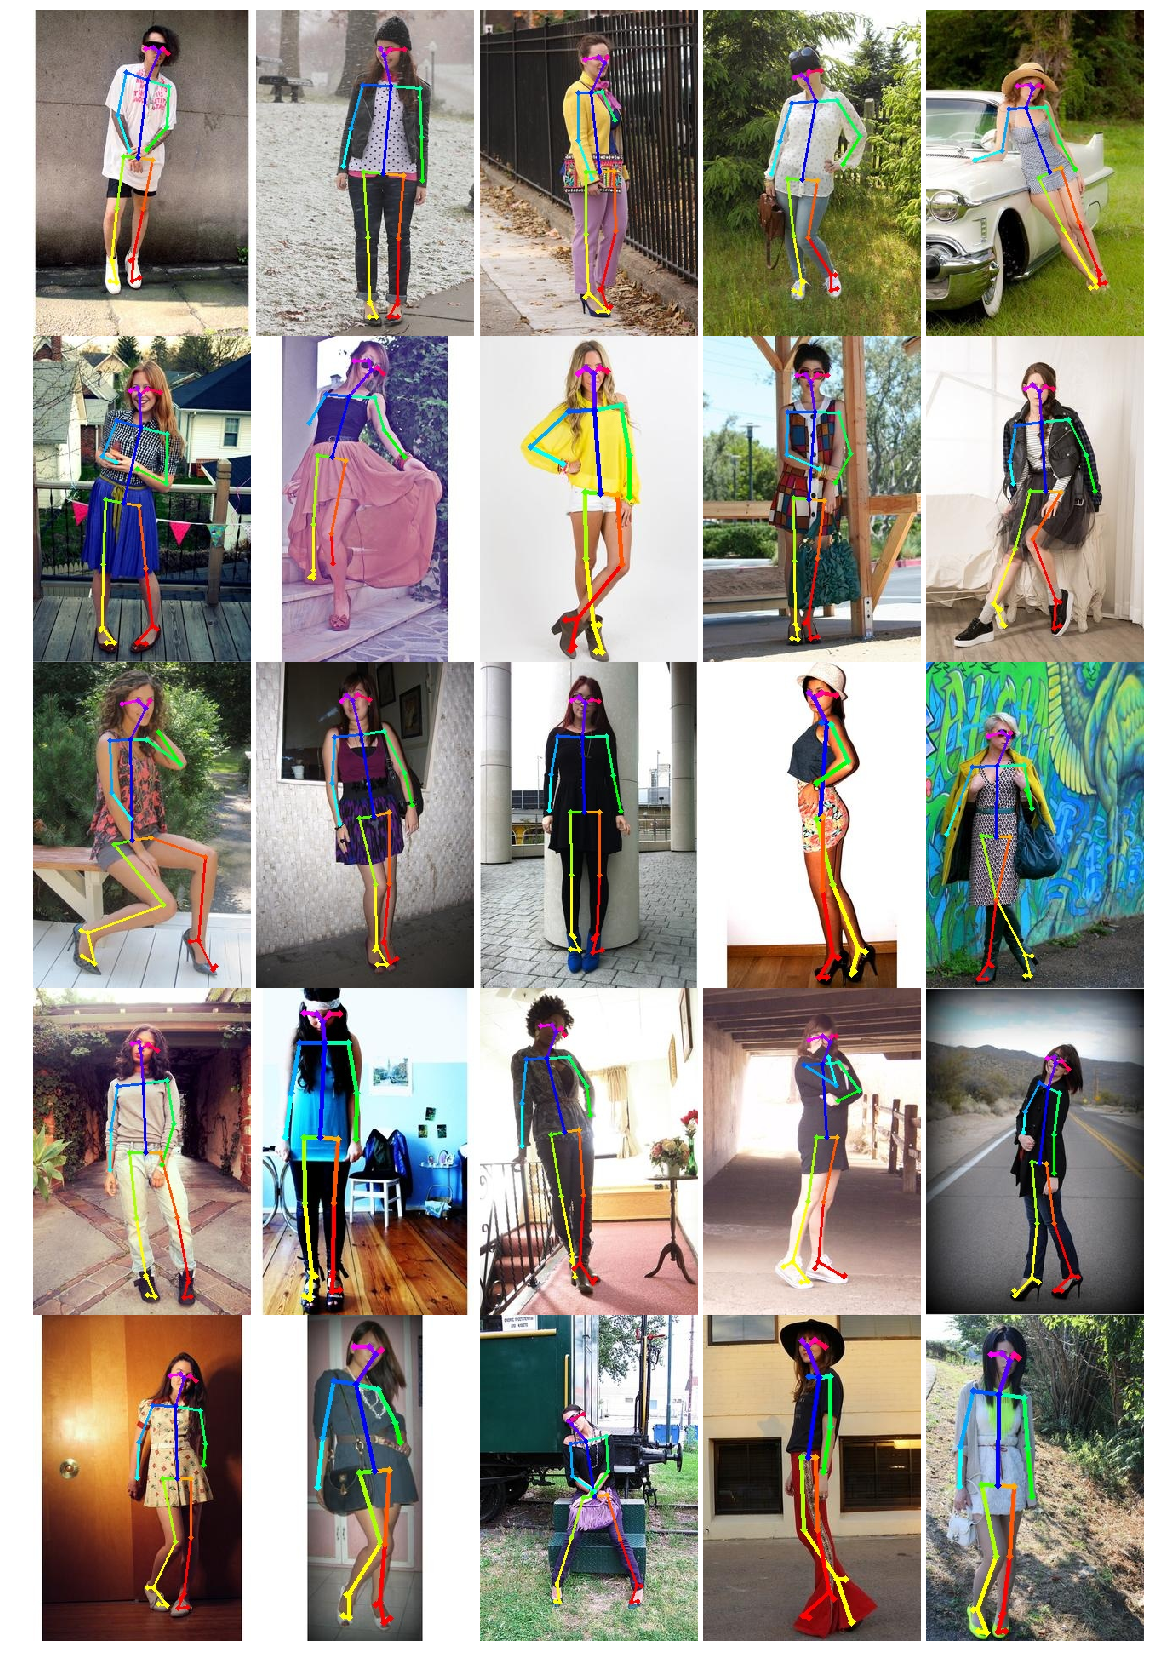

In [69]:
# 画像を可視化
attention1 = [5, 6, 7] + [12, 13, 14]  # 左側
attention2 = [2, 3, 4] + [9, 10, 11]  #　右側
attention3 = [0, 1, 8]  # 中心
threshold = 0
fig, axes = plt.subplots(5, 5, figsize=(20, 30))
for (i, (img_path, keypoints_path,
         visualized_path)), ax in zip(df.iterrows(), axes.flatten()):
    keypoints = np.load(keypoints_path)
    img = cv2.cvtColor(cv2.imread(str(visualized_path)), cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_axis_off()
    judge = np.all(keypoints[:, attention1, 2] > threshold) or np.all(
        keypoints[:, attention2, 2] > threshold)
    judge = np.all(keypoints[:, attention3, 2] > threshold) and judge
    if not judge:
        print(i)
plt.subplots_adjust(hspace=0, wspace=0)

## keypoint をみて，一人かどうかでデータ選択

In [70]:
# 全画像
index = deque(maxlen=len(df)+100)
for i, (_, keypoints_path, _) in tqdm(df.iterrows()):
    keypoints = np.load(keypoints_path)
    if keypoints.shape[0] != 1:
        index.append(False)
    elif keypoints.shape[0] == 1:
        index.append(True)
    else:
        raise Exception
len(index) == len(df)

In [73]:
len(index) == len(df)

True

In [81]:
# 基準にあったもの
s_df = df[pd.Series(index)].reset_index(drop=True)
s_df.head()

img_path  \
0  /home/yohei/Documents/tlab/data/fashion550k/ph...   
1  /home/yohei/Documents/tlab/data/fashion550k/ph...   
2  /home/yohei/Documents/tlab/data/fashion550k/ph...   
3  /home/yohei/Documents/tlab/data/fashion550k/ph...   
4  /home/yohei/Documents/tlab/data/fashion550k/ph...   

                                       keypoint_path  \
0  /home/yohei/Documents/tlab/data/fashion550k/an...   
1  /home/yohei/Documents/tlab/data/fashion550k/an...   
2  /home/yohei/Documents/tlab/data/fashion550k/an...   
3  /home/yohei/Documents/tlab/data/fashion550k/an...   
4  /home/yohei/Documents/tlab/data/fashion550k/an...   

                                     visualized_path  
0  /home/yohei/Documents/tlab/data/fashion550k/an...  
1  /home/yohei/Documents/tlab/data/fashion550k/an...  
2  /home/yohei/Documents/tlab/data/fashion550k/an...  
3  /home/yohei/Documents/tlab/data/fashion550k/an...  
4  /home/yohei/Documents/tlab/data/fashion550k/an...

In [83]:
# 基準にあってないもの
def not4index(i):
    return not i
hoge = pd.Series(map(not4index, index))
d_df = df[hoge].reset_index(drop=True)
d_df.head()

img_path  \
0  /home/yohei/Documents/tlab/data/fashion550k/ph...   
1  /home/yohei/Documents/tlab/data/fashion550k/ph...   
2  /home/yohei/Documents/tlab/data/fashion550k/ph...   
3  /home/yohei/Documents/tlab/data/fashion550k/ph...   
4  /home/yohei/Documents/tlab/data/fashion550k/ph...   

                                       keypoint_path  \
0  /home/yohei/Documents/tlab/data/fashion550k/an...   
1  /home/yohei/Documents/tlab/data/fashion550k/an...   
2  /home/yohei/Documents/tlab/data/fashion550k/an...   
3  /home/yohei/Documents/tlab/data/fashion550k/an...   
4  /home/yohei/Documents/tlab/data/fashion550k/an...   

                                     visualized_path  
0  /home/yohei/Documents/tlab/data/fashion550k/an...  
1  /home/yohei/Documents/tlab/data/fashion550k/an...  
2  /home/yohei/Documents/tlab/data/fashion550k/an...  
3  /home/yohei/Documents/tlab/data/fashion550k/an...  
4  /home/yohei/Documents/tlab/data/fashion550k/an...

In [85]:
print("基準を満たしたデータ数 ： {} | 基準を満たさなかったデータ数 : {}".format(len(s_df), len(d_df)))

基準を満たしたデータ数 ： 391798 | 基準を満たさなかったデータ数 : 13791


## 基準を満たさなかったデータについて見てみる

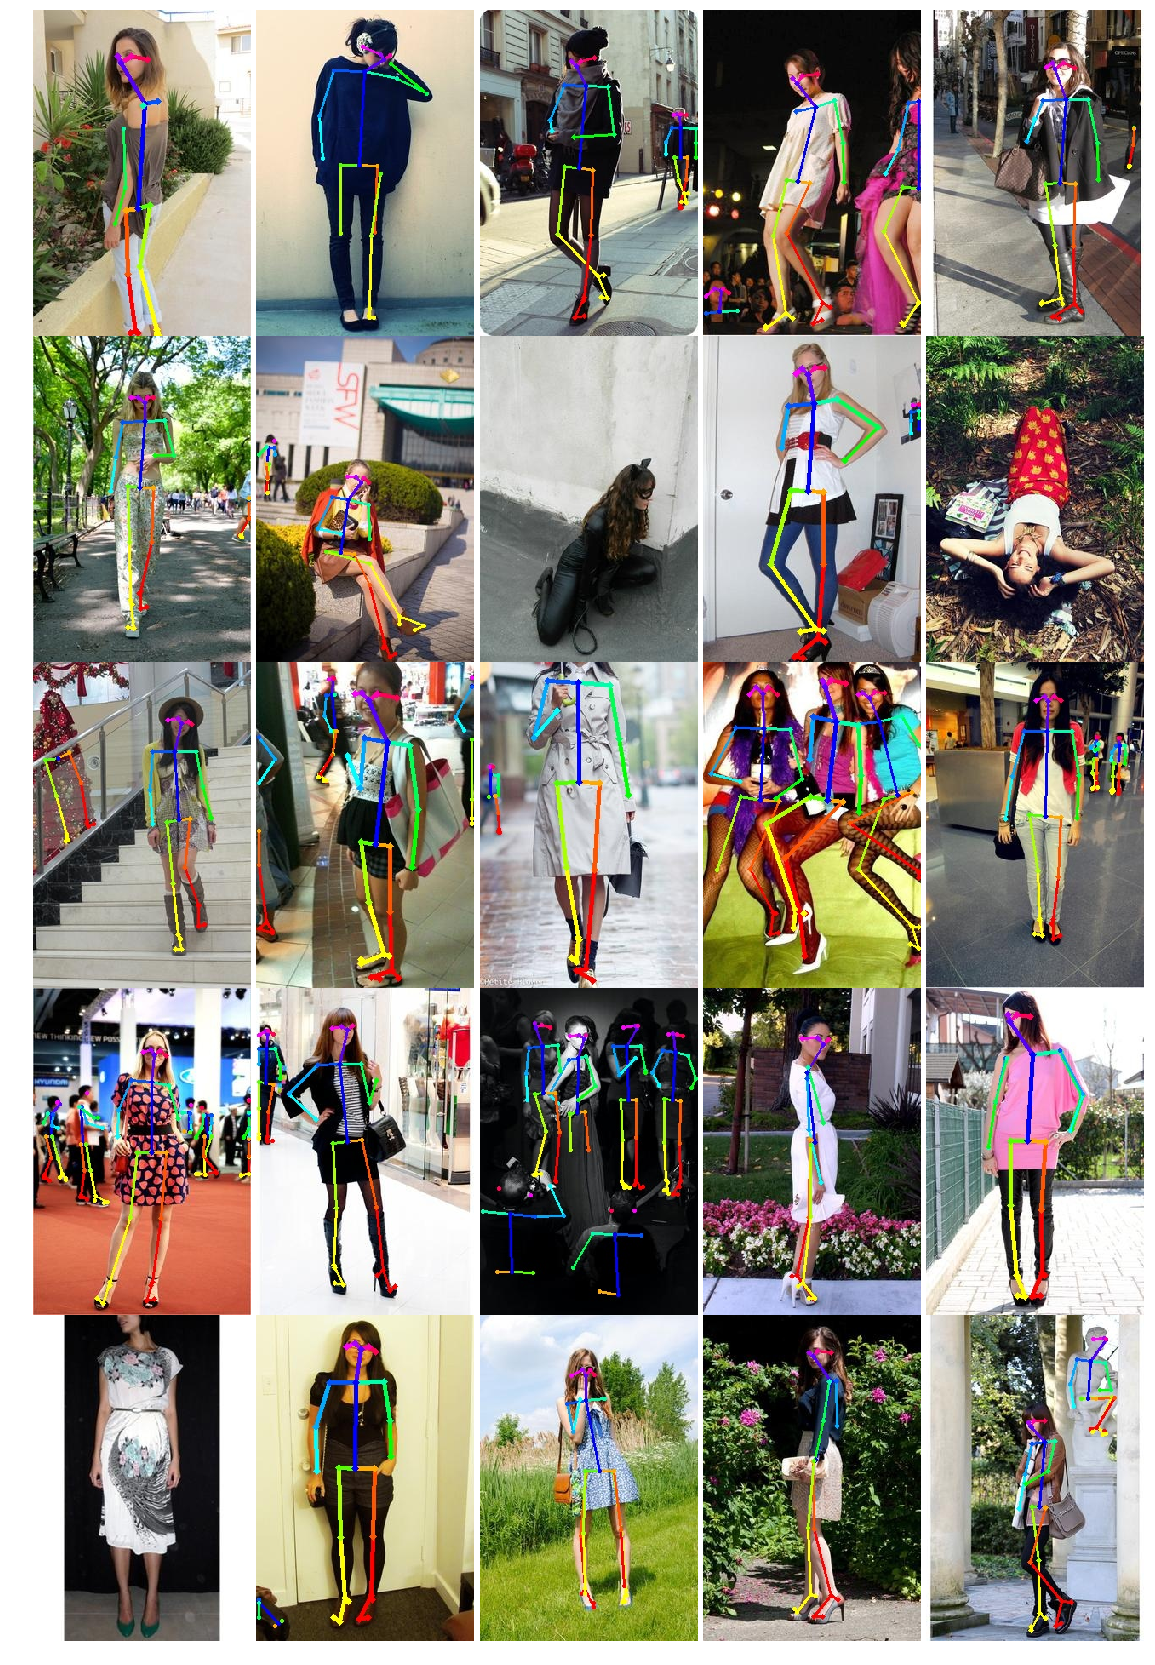

In [88]:
# 画像を可視化
fig, axes = plt.subplots(5, 5, figsize=(20, 30))
for (i, (_, _, visualized_path)), ax in zip(d_df.iterrows(), axes.flatten()):
    img = cv2.cvtColor(cv2.imread(str(visualized_path)), cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_axis_off()
plt.subplots_adjust(hspace=0, wspace=0)

In [89]:
save_dir = pathlib.Path("./selection0-csv_file")
if not save_dir.exists():
    save_dir.mkdir()
s_df.to_csv(save_dir / "select_df.csv", index=False)
d_df.to_csv(save_dir / "deprecation_df.csv", index=False)